**Sleep Health vs. Occupation: Elisabeth Villarreal**

Null Hypothesis (H0): A person’s occupation does not affect their sleep quality.

Alternative Hypothesis (Ha): Sleep quality is affected by occupations that are associated with higher stress levels.

In [1]:
%matplotlib notebook

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as stats
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets

In [4]:
# File path
sleep_health_data = Path("Sleep_Study/Sleep_health_and_lifestyle_dataset.csv")

# Read data 
sleep_df = pd.read_csv(sleep_health_data)
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
# Sample size for each occupation
occupation_count = sleep_df['Occupation'].value_counts()
occupation_count

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [6]:
# Filter out small sample sizes
filtered_sleep_df = sleep_df.loc[sleep_df['Occupation'].isin(['Nurse','Doctor', 'Engineer', 'Lawyer', 'Teacher', 'Accountant', 'Salesperson'])]
filtered_occupation_count = filtered_sleep_df['Occupation'].value_counts()
filtered_occupation_count

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Name: Occupation, dtype: int64

<IPython.core.display.Javascript object>


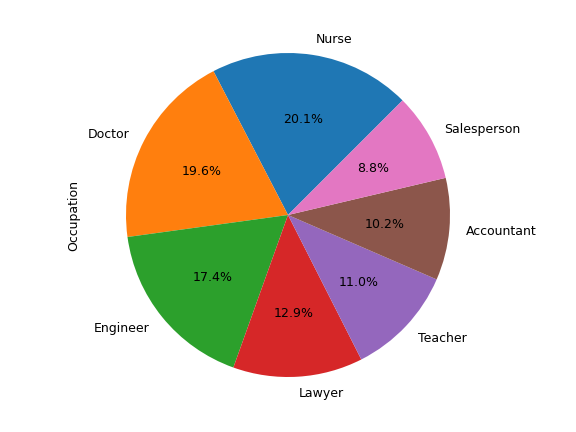

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/occupation_piechart.png'

In [7]:
# Pie chart of Occupations
occupation = filtered_occupation_count
occupation.plot.pie(autopct = "%1.1f%%", startangle = 45)
plt.tight_layout()

plt.savefig("output_data/occupation_piechart.png")
plt.show()

In [11]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the quality of sleep for each occupation 
sleep_quality_mean = filtered_sleep_df.groupby('Occupation').mean()['Quality of Sleep']
sleep_quality_median = filtered_sleep_df.groupby('Occupation').median()['Quality of Sleep']
sleep_quality_var = filtered_sleep_df.groupby('Occupation').var()['Quality of Sleep']
sleep_quality_std = filtered_sleep_df.groupby('Occupation').std()['Quality of Sleep']
sleep_quality_sem = filtered_sleep_df.groupby('Occupation').sem()['Quality of Sleep']

# DataFrame of resulting series

sleep_quality_df = pd.DataFrame({'Mean Sleep Quality': sleep_quality_mean,
                       'Median Sleep Quality': sleep_quality_median,
                       'Sleep Quality Variance': sleep_quality_var,
                       'Sleep Quality Std. Dev.': sleep_quality_std,
                       'Sleep Quality Std. Err.': sleep_quality_sem})

sleep_quality_df

C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\2154792038.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sleep_quality_mean = filtered_sleep_df.groupby('Occupation').mean()['Quality of Sleep']
C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\2154792038.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sleep_quality_median = filtered_sleep_df.groupby('Occupation').median()['Quality of Sleep']
C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\2154792038.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to F

,Mean Sleep Quality,Median Sleep Quality,Sleep Quality Variance,Sleep Quality Std. Dev.,Sleep Quality Std. Err.
Occupation,,,,,
Accountant,7.891892,8.0,0.210210,0.458487,0.075375
Doctor,6.647887,7.0,0.574245,0.757790,0.089933
Engineer,8.412698,9.0,0.568868,0.754234,0.095025
Lawyer,7.893617,8.0,0.097132,0.311661,0.045460
Nurse,7.369863,6.0,2.402968,1.550151,0.181431
Salesperson,6.000000,6.0,0.000000,0.000000,0.000000
Teacher,6.975000,7.0,0.435256,0.659740,0.104314


In [12]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the stress level for each occupation 
stress_level_mean = filtered_sleep_df.groupby('Occupation').mean()['Stress Level']
stress_level_median = filtered_sleep_df.groupby('Occupation').median()['Stress Level']
stress_level_var = filtered_sleep_df.groupby('Occupation').var()['Stress Level']
stress_level_std = filtered_sleep_df.groupby('Occupation').std()['Stress Level']
stress_level_sem = filtered_sleep_df.groupby('Occupation').sem()['Stress Level']

# DataFrame of resulting series

stress_level_df = pd.DataFrame({'Mean Stress Level': stress_level_mean,
                       'Median Stress Level': stress_level_median,
                       'Stress Level Variance': stress_level_var,
                       'Stress Level Std. Dev.': stress_level_std,
                       'Stress Level Std. Err.': stress_level_sem})

stress_level_df

C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\3340092702.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stress_level_mean = filtered_sleep_df.groupby('Occupation').mean()['Stress Level']
C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\3340092702.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stress_level_median = filtered_sleep_df.groupby('Occupation').median()['Stress Level']
C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\3340092702.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Eith

,Mean Stress Level,Median Stress Level,Stress Level Variance,Stress Level Std. Dev.,Stress Level Std. Err.
Occupation,,,,,
Accountant,4.594595,4.0,1.525526,1.235122,0.203053
Doctor,6.732394,6.0,1.884507,1.372773,0.162918
Engineer,3.888889,3.0,1.293907,1.137500,0.143312
Lawyer,5.063830,5.0,0.061055,0.247092,0.036042
Nurse,5.547945,6.0,5.723364,2.392355,0.280004
Salesperson,7.000000,7.0,0.000000,0.000000,0.000000
Teacher,4.525000,4.0,1.127564,1.061868,0.167896


In [13]:
# Combine DataFrames for a cohesive table to analyze
combined_sleep_data = pd.merge(sleep_quality_df, stress_level_df, on='Occupation', how='outer')
combined_sleep_data

,Mean Sleep Quality,Median Sleep Quality,Sleep Quality Variance,Sleep Quality Std. Dev.,Sleep Quality Std. Err.,Mean Stress Level,Median Stress Level,Stress Level Variance,Stress Level Std. Dev.,Stress Level Std. Err.
Occupation,,,,,,,,,,
Accountant,7.891892,8.0,0.210210,0.458487,0.075375,4.594595,4.0,1.525526,1.235122,0.203053
Doctor,6.647887,7.0,0.574245,0.757790,0.089933,6.732394,6.0,1.884507,1.372773,0.162918
Engineer,8.412698,9.0,0.568868,0.754234,0.095025,3.888889,3.0,1.293907,1.137500,0.143312
Lawyer,7.893617,8.0,0.097132,0.311661,0.045460,5.063830,5.0,0.061055,0.247092,0.036042
Nurse,7.369863,6.0,2.402968,1.550151,0.181431,5.547945,6.0,5.723364,2.392355,0.280004
Salesperson,6.000000,6.0,0.000000,0.000000,0.000000,7.000000,7.0,0.000000,0.000000,0.000000
Teacher,6.975000,7.0,0.435256,0.659740,0.104314,4.525000,4.0,1.127564,1.061868,0.167896


The correlation between sleep quality and stress associated with occupation is -0.86


<IPython.core.display.Javascript object>


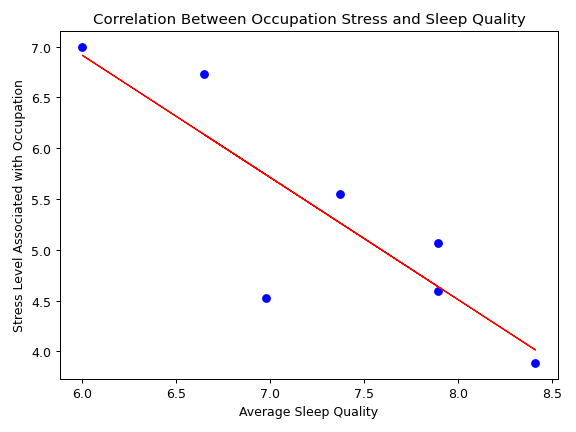

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/occupation_sleep_stress_corr.png'

In [16]:
# Bar Plot for Occupation vs. Stress Level
occupation_correlation = st.pearsonr(combined_sleep_data['Mean Sleep Quality'],combined_sleep_data['Mean Stress Level'])
print(f"The correlation between sleep quality and stress associated with occupation is {round(occupation_correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(combined_sleep_data['Mean Sleep Quality'],combined_sleep_data['Mean Stress Level'])
regress_values=combined_sleep_data['Mean Sleep Quality']* slope + intercept

plt.scatter(combined_sleep_data['Mean Sleep Quality'],combined_sleep_data['Mean Stress Level'],color="blue")
plt.plot(combined_sleep_data['Mean Sleep Quality'], regress_values, linewidth = 1, color="red")
plt.xlabel("Average Sleep Quality")
plt.ylabel("Stress Level Associated with Occupation")
plt.title("Correlation Between Occupation Stress and Sleep Quality")
plt.tight_layout()

plt.savefig("output_data/occupation_sleep_stress_corr.png")
plt.show()

**Analysis:** Sleep quality and occupation stress have a negative correlation (r-value = -0.86). The higher the occupation stress, the lower the sleep quality.

In [17]:
# Calculate Independent (Two Sample) t-test
occupation_sleep = combined_sleep_data['Mean Sleep Quality']
occupation_stress = combined_sleep_data['Mean Stress Level']

stats.ttest_ind(occupation_sleep, occupation_stress, equal_var=False)

Ttest_indResult(statistic=3.6523583734752507, pvalue=0.0038807552010945226)

**Analysis:** The p-value is less than 0.05 (0.004). Therefore, sleep quality and occupation stress are statistically significant and we can reject the null hypothesis.

JESSICA ANALYSIS

Objective/Task: Analysis of trends/correlations between health factors and sleep disorders.

Question: Does lack of sleep cause certain health problems in patients with diagnosed sleep disorders versus patients without sleep disorders?

Null Hypothesis: There is no significant relationship between health factors (Blood pressure, Heart rate, BMI) and patients with sleep disorders. No difference between these factors between patients with a disorder and patients without.

Alternative Hypothesis: There is significant cause and effect between health factors (Blood pressure, Heart rate, BMI) and patients with sleep disorders.


In [18]:
sleep_df[['systolic blood pressure','diastolic blood pressure']] = sleep_df['Blood Pressure'].str.split("/", expand=True)
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic blood pressure,diastolic blood pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [19]:
sleep_df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [20]:
sleep_df[['systolic blood pressure','diastolic blood pressure']] = sleep_df['Blood Pressure'].str.split("/", expand=True).astype(float)
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic blood pressure,diastolic blood pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [21]:
sleep_cleaned = sleep_df[['Person ID','Sleep Duration', 'Quality of Sleep','BMI Category','systolic blood pressure','diastolic blood pressure','Heart Rate','Sleep Disorder']]

In [22]:
health_stat_table1 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'Sleep Duration':["mean", "median","var","std","sem"]})
health_stat_table2 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'Quality of Sleep':["mean", "median","var","std","sem"]})
health_stat_table3 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'Heart Rate':["mean", "median","var","std","sem"]})
health_stat_table4 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'systolic blood pressure':["mean", "median","var","std","sem"]})
health_stat_table5 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'diastolic blood pressure':["mean", "median","var","std","sem"]})

health_stat_table6 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'Sleep Duration':["mean", "median","var","std","sem"]})
health_stat_table7 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'Quality of Sleep':["mean", "median","var","std","sem"]})
health_stat_table8 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'Heart Rate':["mean", "median","var","std","sem"]})
health_stat_table9 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'systolic blood pressure':["mean", "median","var","std","sem"]})
health_stat_table10 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'diastolic blood pressure':["mean", "median","var","std","sem"]})

health_stat_table11 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'Sleep Duration':["mean", "median","var","std","sem"]})
health_stat_table12 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'Quality of Sleep':["mean", "median","var","std","sem"]})
health_stat_table13 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'Heart Rate':["mean", "median","var","std","sem"]})
health_stat_table14 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'systolic blood pressure':["mean", "median","var","std","sem"]})
health_stat_table15 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'diastolic blood pressure':["mean", "median","var","std","sem"]})


In [23]:
health_stats_none_merged = health_stat_table1.copy()

health_stats_none_merged['Quality of Sleep']= health_stat_table2['Quality of Sleep']
health_stats_none_merged['Heart Rate']= health_stat_table3['Heart Rate']
health_stats_none_merged['systolic blood pressure']= health_stat_table4['systolic blood pressure']
health_stats_none_merged['diastolic blood pressure']= health_stat_table5['diastolic blood pressure']


In [24]:
health_stats_none_merged

,Sleep Duration,Quality of Sleep,Heart Rate,systolic blood pressure,diastolic blood pressure
mean,7.358447,7.625571,69.018265,124.045662,81.000000
median,7.400000,8.000000,70.000000,125.000000,80.000000
var,0.536293,0.950903,7.063885,32.887814,15.926606
std,0.732320,0.975142,2.657797,5.734790,3.990815
sem,0.049486,0.065894,0.179597,0.387521,0.269674


In [25]:
health_stats_apnea_merged = health_stat_table6.copy()

health_stats_apnea_merged['Quality of Sleep']= health_stat_table7['Quality of Sleep']
health_stats_apnea_merged['Heart Rate']= health_stat_table8['Heart Rate']
health_stats_apnea_merged['systolic blood pressure']= health_stat_table9['systolic blood pressure']
health_stats_apnea_merged['diastolic blood pressure']= health_stat_table10['diastolic blood pressure']

health_stats_apnea_merged

,Sleep Duration,Quality of Sleep,Heart Rate,systolic blood pressure,diastolic blood pressure
mean,7.032051,7.205128,73.089744,137.769231,92.717949
median,6.800000,6.000000,75.000000,140.000000,95.000000
var,0.950258,2.710623,26.186647,26.439560,20.153180
std,0.974812,1.646397,5.117289,5.141941,4.489229
sem,0.110376,0.186418,0.579419,0.582210,0.508305


In [26]:
health_stats_insomnia_merged = health_stat_table11.copy()

health_stats_insomnia_merged['Quality of Sleep']= health_stat_table12['Quality of Sleep']
health_stats_insomnia_merged['Heart Rate']= health_stat_table13['Heart Rate']
health_stats_insomnia_merged['systolic blood pressure']= health_stat_table14['systolic blood pressure']
health_stats_insomnia_merged['diastolic blood pressure']= health_stat_table15['diastolic blood pressure']

health_stats_insomnia_merged

,Sleep Duration,Quality of Sleep,Heart Rate,systolic blood pressure,diastolic blood pressure
mean,6.589610,6.532468,70.467532,132.038961,86.857143
median,6.500000,7.000000,72.000000,130.000000,85.000000
var,0.149891,0.646958,24.489064,15.485304,10.097744
std,0.387157,0.804337,4.948643,3.935137,3.177695
sem,0.044121,0.091663,0.563950,0.448450,0.362132


In [27]:
control = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None']
apnea = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea']
insomnia = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia']

In [28]:
stats.ttest_ind(control['Sleep Duration'],apnea['Sleep Duration'])

Ttest_indResult(statistic=3.0837349347047125, pvalue=0.0022377044307714178)

In [29]:
stats.ttest_ind(control['Quality of Sleep'],apnea['Quality of Sleep'])

Ttest_indResult(statistic=2.6850628735269377, pvalue=0.007661936450979)

In [30]:
stats.ttest_ind(control['systolic blood pressure'],apnea['systolic blood pressure'])

Ttest_indResult(statistic=-18.631512683042992, pvalue=9.397806654358879e-52)

In [31]:
stats.ttest_ind(control['diastolic blood pressure'],apnea['diastolic blood pressure'])

Ttest_indResult(statistic=-21.53464843219751, pvalue=1.8096144119624439e-62)

In [32]:
stats.ttest_ind(control['Heart Rate'],apnea['Heart Rate'])

Ttest_indResult(statistic=-8.893141383973877, pvalue=6.080232027932548e-17)

In [33]:
stats.ttest_ind(control['Sleep Duration'],insomnia['Sleep Duration'])

Ttest_indResult(statistic=8.784361641549475, pvalue=1.3296979544241514e-16)

In [34]:
stats.ttest_ind(control['Quality of Sleep'],insomnia['Quality of Sleep'])

Ttest_indResult(statistic=8.833683252255163, pvalue=9.388601134698313e-17)

In [35]:
stats.ttest_ind(control['Heart Rate'],insomnia['Heart Rate'])

Ttest_indResult(statistic=-3.216135888583218, pvalue=0.001444178722913637)

In [36]:
stats.ttest_ind(control['systolic blood pressure'],insomnia['systolic blood pressure'])

Ttest_indResult(statistic=-11.323247457299466, pvalue=6.551792290581626e-25)

In [37]:
stats.ttest_ind(control['diastolic blood pressure'],apnea['diastolic blood pressure'])

Ttest_indResult(statistic=-21.53464843219751, pvalue=1.8096144119624439e-62)

T-testing results between the following groupings on disorders:

Control group - patients without sleep disorders
Apnea group - patients with apnea sleep disorder
Insomnia group - patients with insomnia sleep disorder

The following results show statistical significance:

Systolic blood pressure, diastolic blood pressure, and heart rate in patients with Apnea sleep disorder

Sleep duration, quality of sleep, systolic and diastolic blood pressure in patients with Insomnia sleep disorder

Therefore, we can reject the null hypothethis that certain health factors are not related and/or symptoms of sleep disorders, specifically Insomnia and Sleep Apnea. 


In [38]:
#defining my linear regression model and function for Sleep Duration

def plot_lin_regress1(x_values,y_values,coords,ylabel,xlabel,title,num):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors="green",marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f'output_data/Fig{num}.png')
    plt.show()
    

<IPython.core.display.Javascript object>


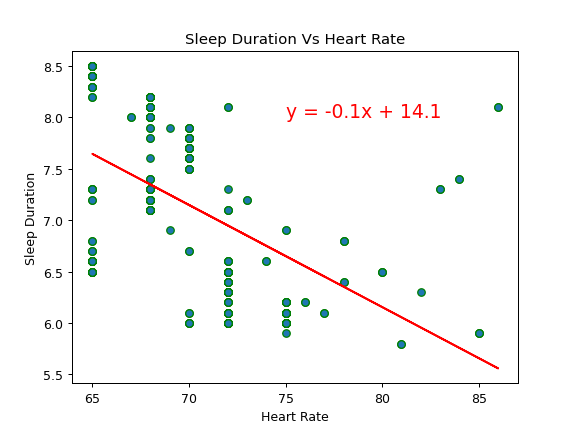

The r-squared is: 0.26672565187325387


In [48]:
x_values = sleep_cleaned['Heart Rate']
y_values = sleep_cleaned['Sleep Duration']

# Incorporate the other graph properties
plot_lin_regress1(x_values,y_values,(75,8),'Sleep Duration', 'Heart Rate','Sleep Duration Vs Heart Rate','SleepHeartRate')

<IPython.core.display.Javascript object>


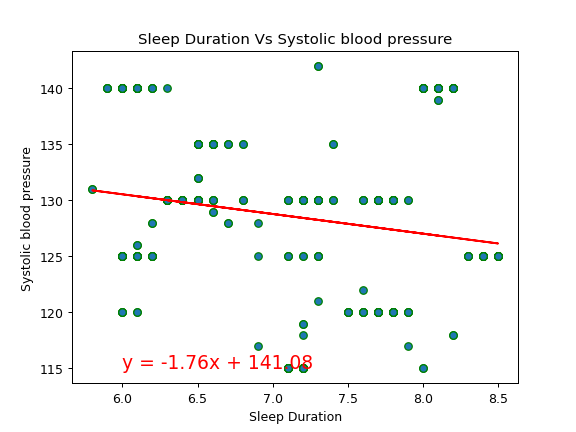

The r-squared is: 0.032546424575354074


In [49]:
x_values = sleep_cleaned['Sleep Duration']
y_values = sleep_cleaned['systolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress1(x_values,y_values,(6,115),'Systolic blood pressure','Sleep Duration','Sleep Duration Vs Systolic blood pressure','SystolicDuration')

<IPython.core.display.Javascript object>


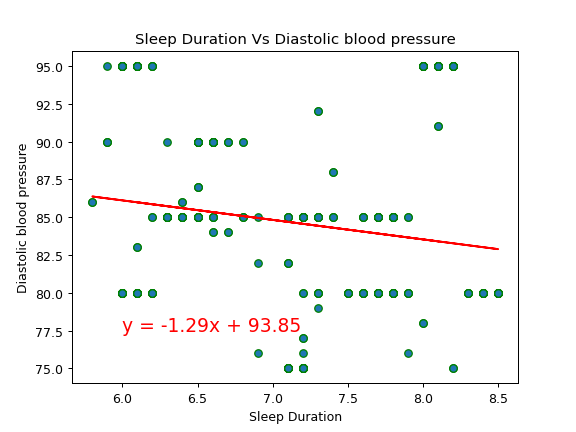

The r-squared is: 0.02774552109298087


In [50]:
x_values = sleep_cleaned['Sleep Duration']
y_values = sleep_cleaned['diastolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress1(x_values,y_values,(6,77.5),'Diastolic blood pressure','Sleep Duration','Sleep Duration Vs Diastolic blood pressure','DiastolicDuration')

In [51]:
#defining my linear regression model and function for Sleep Quality

def plot_lin_regress2(x_values,y_values,coords,xlabel,ylabel,title,num):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors="black",marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="blue")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"output_data/Fig{num}.png")
    plt.show()

<IPython.core.display.Javascript object>


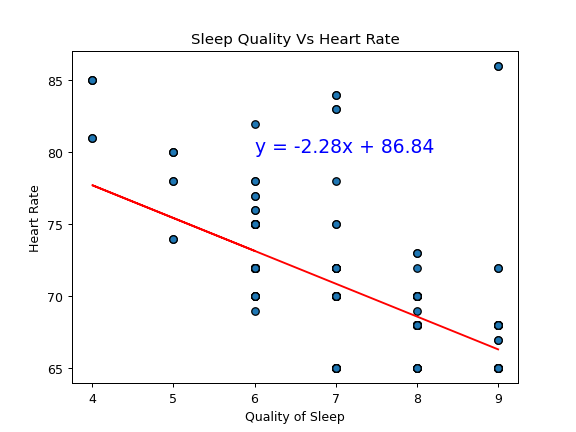

The r-squared is: 0.4354214660524938


In [52]:
x_values = sleep_cleaned['Quality of Sleep']
y_values = sleep_cleaned['Heart Rate']

# Incorporate the other graph properties
plot_lin_regress2(x_values,y_values,(6,80),'Quality of Sleep','Heart Rate','Sleep Quality Vs Heart Rate','HeartRateQuality')

<IPython.core.display.Javascript object>


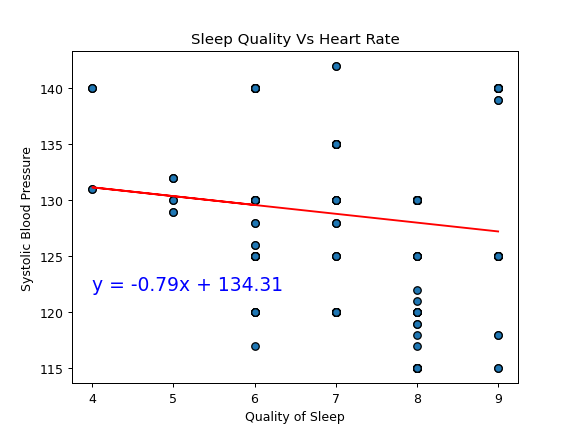

The r-squared is: 0.014794342483421548


In [53]:
x_values = sleep_cleaned['Quality of Sleep']
y_values = sleep_cleaned['systolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress2(x_values,y_values,(4,122),'Quality of Sleep','Systolic Blood Pressure','Sleep Quality Vs Heart Rate','SystolicQuality')

<IPython.core.display.Javascript object>


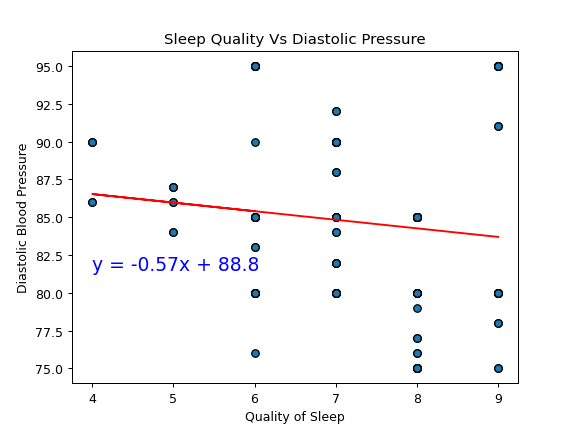

The r-squared is: 0.012133226761624248


In [54]:
x_values = sleep_cleaned['Quality of Sleep']
y_values = sleep_cleaned['diastolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress2(x_values,y_values,(4,81.5),'Quality of Sleep','Diastolic Blood Pressure','Sleep Quality Vs Diastolic Pressure','DiastolicQuality')

In [55]:
#defining my linear regression model and function for Heart Rate

def plot_lin_regress3(x_values,y_values,coords,xlabel,ylabel,title,num):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors="red",marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="blue")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"output_data/Fig{num}.png")
    plt.show()

<IPython.core.display.Javascript object>


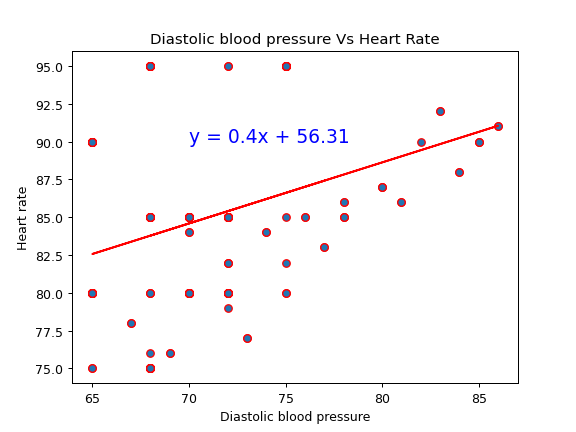

The r-squared is: 0.0734909911928335


In [56]:
x_values = sleep_cleaned['Heart Rate']
y_values = sleep_cleaned['diastolic blood pressure']

plot_lin_regress3(x_values,y_values,(70,90),'Diastolic blood pressure','Heart rate','Diastolic blood pressure Vs Heart Rate','DiastolicHeartRate')

<IPython.core.display.Javascript object>


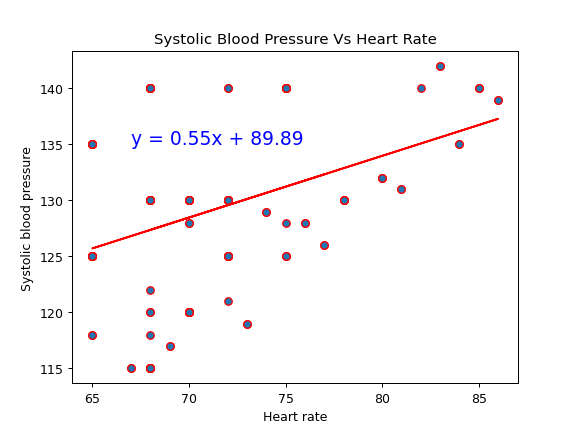

The r-squared is: 0.08652005812524985


In [57]:
x_values = sleep_cleaned['Heart Rate']
y_values = sleep_cleaned['systolic blood pressure']

plot_lin_regress3(x_values,y_values,(67,135),'Heart rate','Systolic blood pressure','Systolic Blood Pressure Vs Heart Rate','SystolicHeartRate')

Findings from scatterplots:

The diastolic and systolic blood pressures show a similar trend of increasing alongside heartrate, signaling that there is a relationship between increased blood pressure when the heart is actively pumping (systolic) and when the pressure between pumps (diastolic) increases.

There is also an increase in Heart rate with less sleep duration, which is a symptom of Insomnia, and a decrease in reported quality of sleep associated with higher heart rates, a symptom of Sleep Apnea. 

Normal control group with no reported sleep disorders has the highest duration and quality of sleep patterns, with overall lower systolic and diastolic blood pressures. 


In [55]:
disorder = sleep_cleaned.groupby('Sleep Disorder').count()['Person ID']

<IPython.core.display.Javascript object>


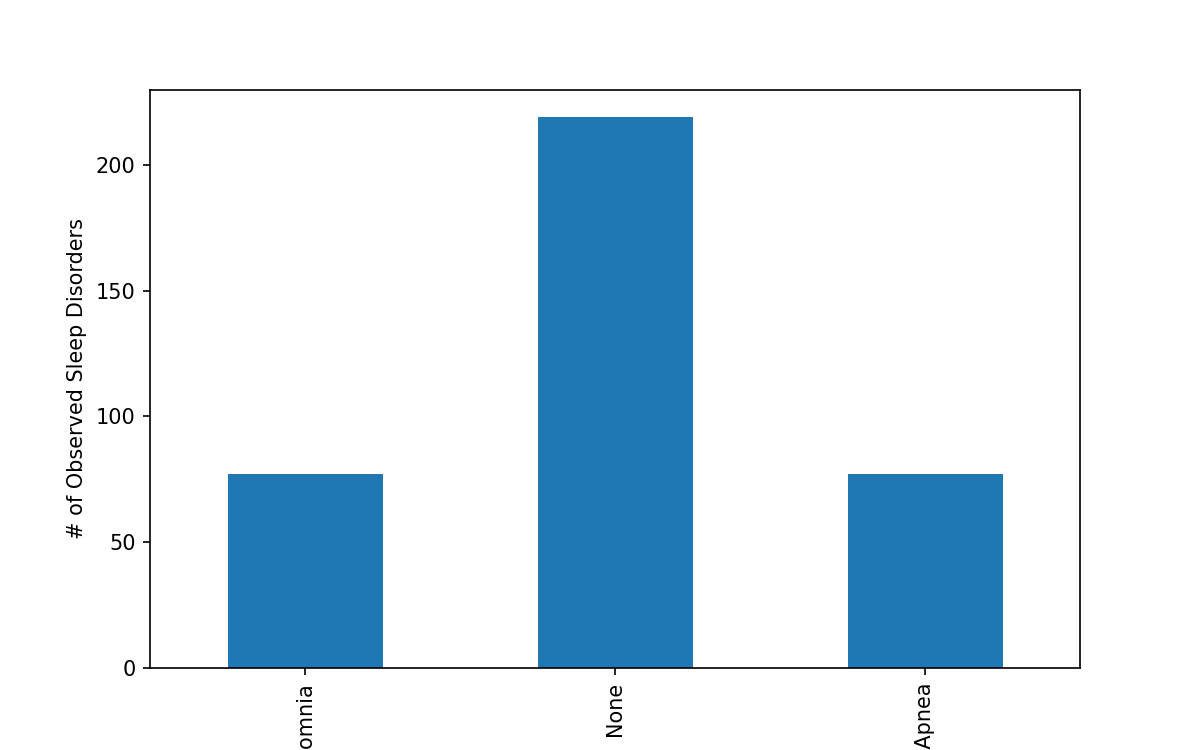

In [56]:
bar_plot = disorder.plot(kind="bar",figsize=(8,5))

bar_plot.set_xlabel("Sleep Disorder")
bar_plot.set_ylabel("# of Observed Sleep Disorders")

plt.show()

In [57]:
#boxplots 
# Put disorders into a list for for loop (and later for plot labels)

Disorders = ["None", "Insomnia", "Sleep Apnea"]

# Create empty list to fill with systolic blood pressure data (for plotting)

Disorder_sys = []

for disorder in Disorders:
    # Locate the rows which contain each disorder and get the systolic blood pressure 
    disorder_list = sleep_cleaned[sleep_cleaned['Sleep Disorder'] == disorder]
    
    # add subset 
    Disorder_sys.append(disorder_list['systolic blood pressure'])
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    quartiles = sleep_cleaned['systolic blood pressure'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_systolic = disorder_list.loc[(sleep_cleaned['systolic blood pressure'] < lower_bound) | (sleep_cleaned['systolic blood pressure'] > upper_bound)]
    outlier_systolic
    
    print(f"The lower quartile of {disorder} is: {lowerq}")
    print(f"The upper quartile of {disorder} is: {upperq}")
    print(f"The interquartile range of {disorder} is: {iqr}")
    print(f"The the median of {disorder} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The lower quartile of None is: 125.0
The upper quartile of None is: 135.0
The interquartile range of None is: 10.0
The the median of None is: 130.0 
Values below 110.0 could be outliers.
Values above 150.0 could be outliers.
The lower quartile of Insomnia is: 125.0
The upper quartile of Insomnia is: 135.0
The interquartile range of Insomnia is: 10.0
The the median of Insomnia is: 130.0 
Values below 110.0 could be outliers.
Values above 150.0 could be outliers.
The lower quartile of Sleep Apnea is: 125.0
The upper quartile of Sleep Apnea is: 135.0
The interquartile range of Sleep Apnea is: 10.0
The the median of Sleep Apnea is: 130.0 
Values below 110.0 could be outliers.
Values above 150.0 could be outliers.


<IPython.core.display.Javascript object>


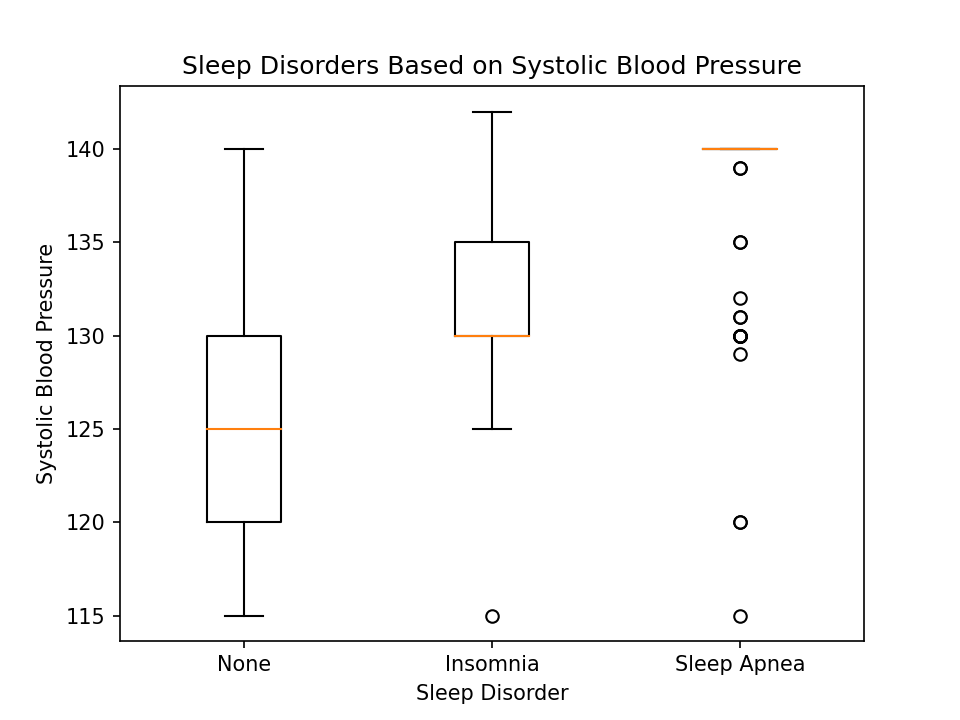

C:\Users\jessi\AppData\Local\Temp\ipykernel_18016\338011601.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])


In [58]:
# Generate a box plot that shows the distrubution of the systolic blood pressure for each patient group.
#need more than one box plot on same chart 
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Disorders Based on Systolic Blood Pressure')
ax1.set_ylabel('Systolic Blood Pressure')
ax1.set_xlabel('Sleep Disorder')
ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])

#input the list I made with my for loop
ax1.boxplot(Disorder_sys)
plt.savefig(f"output_data/Fig.Sys.Boxplot.png")
plt.show()

In [59]:
#boxplots 
# Put disorders into a list for for loop (and later for plot labels)

Disorders = ["None", "Insomnia", "Sleep Apnea"]

# Create empty list to fill with systolic blood pressure data (for plotting)

Disorder_dia = []

for disorder in Disorders:
    # Locate the rows which contain each disorder and get the systolic blood pressure 
    disorder_list = sleep_cleaned[sleep_cleaned['Sleep Disorder'] == disorder]
    
    # add subset 
    Disorder_dia.append(disorder_list['diastolic blood pressure'])
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    quartiles = sleep_cleaned['diastolic blood pressure'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_diastolic = disorder_list.loc[(sleep_cleaned['diastolic blood pressure'] < lower_bound) | (sleep_cleaned['diastolic blood pressure'] > upper_bound)]
    outlier_diastolic
    
    print(f"The lower quartile of {disorder} is: {lowerq}")
    print(f"The upper quartile of {disorder} is: {upperq}")
    print(f"The interquartile range of {disorder} is: {iqr}")
    print(f"The the median of {disorder} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of None is: 80.0
The upper quartile of None is: 90.0
The interquartile range of None is: 10.0
The the median of None is: 85.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.
The lower quartile of Insomnia is: 80.0
The upper quartile of Insomnia is: 90.0
The interquartile range of Insomnia is: 10.0
The the median of Insomnia is: 85.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.
The lower quartile of Sleep Apnea is: 80.0
The upper quartile of Sleep Apnea is: 90.0
The interquartile range of Sleep Apnea is: 10.0
The the median of Sleep Apnea is: 85.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.


<IPython.core.display.Javascript object>


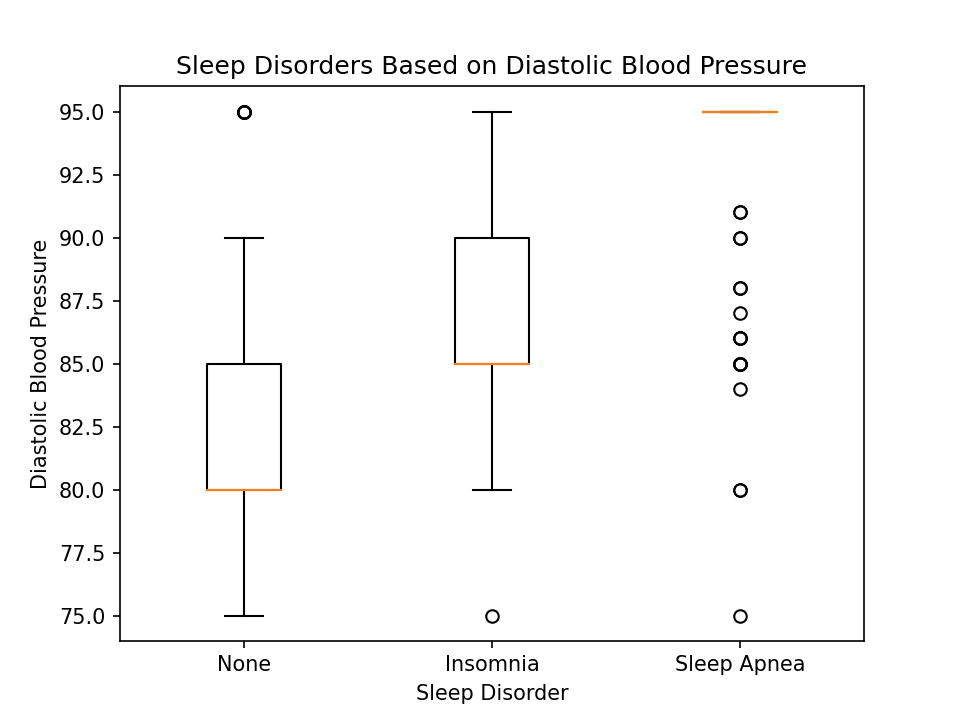

C:\Users\jessi\AppData\Local\Temp\ipykernel_18016\3122119230.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])


In [60]:
# Generate a box plot that shows the distrubution of the diastolic blood pressure for each patient group.
#need more than one box plot on same chart 
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Disorders Based on Diastolic Blood Pressure')
ax1.set_ylabel('Diastolic Blood Pressure')
ax1.set_xlabel('Sleep Disorder')
ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])

#input the list I made with my for loop
ax1.boxplot(Disorder_dia)
plt.savefig(f"output_data/Fig.Dia.Boxplot.png")
plt.show()

In [61]:
# Put disorders into a list for for loop (and later for plot labels)

Disorders = ["None", "Insomnia", "Sleep Apnea"]

# Create empty list to fill with heart rate data (for plotting)

Disorder_heart = []

for disorder in Disorders:
    # Locate the rows which contain each disorder and get the heart rate
    disorder_list = sleep_cleaned[sleep_cleaned['Sleep Disorder'] == disorder]
    
    # add subset 
    Disorder_heart.append(disorder_list['Heart Rate'])
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    quartiles = sleep_cleaned['Heart Rate'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_heart = disorder_list.loc[(sleep_cleaned['Heart Rate'] < lower_bound) | (sleep_cleaned['Heart Rate'] > upper_bound)]
    outlier_heart
    
    print(f"The lower quartile of {disorder} is: {lowerq}")
    print(f"The upper quartile of {disorder} is: {upperq}")
    print(f"The interquartile range of {disorder} is: {iqr}")
    print(f"The the median of {disorder} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of None is: 68.0
The upper quartile of None is: 72.0
The interquartile range of None is: 4.0
The the median of None is: 70.0 
Values below 62.0 could be outliers.
Values above 78.0 could be outliers.
The lower quartile of Insomnia is: 68.0
The upper quartile of Insomnia is: 72.0
The interquartile range of Insomnia is: 4.0
The the median of Insomnia is: 70.0 
Values below 62.0 could be outliers.
Values above 78.0 could be outliers.
The lower quartile of Sleep Apnea is: 68.0
The upper quartile of Sleep Apnea is: 72.0
The interquartile range of Sleep Apnea is: 4.0
The the median of Sleep Apnea is: 70.0 
Values below 62.0 could be outliers.
Values above 78.0 could be outliers.


<IPython.core.display.Javascript object>


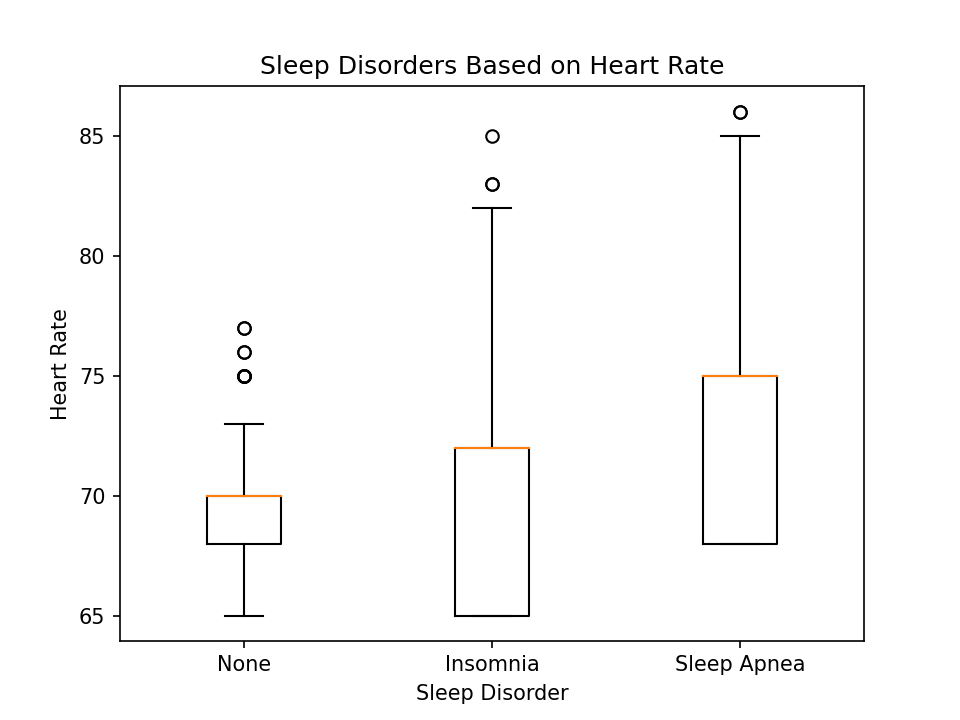

C:\Users\jessi\AppData\Local\Temp\ipykernel_18016\749450220.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])


In [62]:
# Generate a box plot that shows the distrubution of the heart rate for each patient group.
#need more than one box plot on same chart 
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Disorders Based on Heart Rate')
ax1.set_ylabel('Heart Rate')
ax1.set_xlabel('Sleep Disorder')
ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])

#input the list I made with my for loop
ax1.boxplot(Disorder_heart)
plt.savefig(f"output_data/Fig.HeartRate.Boxplot.png")
plt.show()

Conclusion based off Box plot data:

There are more outliers in the Sleep Apnea data regarding diastolic and systolic blood pressure rates. This indicates that Sleep Apnea is significantly outside normal distribution of diastolic and systolic pressure rates compared to the control group of normal patients. This signals that Sleep Apnea has a high effect on the diastolic, systolic, and overall heart rates of patients by an overall higher rate than patients with no sleep or Insomnia disorders.

It can also be noted that overall heart rate for Sleep Apnea is higher than patients with no sleep disorders, and Insomnia patients are more varied but start in the lower quartile as lower heart rates compared to patients with no disorders.

In [58]:
disorder_df=sleep_df[["Gender", "Age", "Sleep Disorder", "Sleep Duration"]]
disorder_df

,Gender,Age,Sleep Disorder,Sleep Duration
0,Male,27,None,6.1
1,Male,28,None,6.2
2,Male,28,None,6.2
3,Male,28,Sleep Apnea,5.9
4,Male,28,Sleep Apnea,5.9
...,...,...,...,...
369,Female,59,Sleep Apnea,8.1
370,Female,59,Sleep Apnea,8.0
371,Female,59,Sleep Apnea,8.1
372,Female,59,Sleep Apnea,8.1


In [59]:
dub_disorder_df=disorder_df[disorder_df["Gender"]=="Female"]
dub_disorder_df


,Gender,Age,Sleep Disorder,Sleep Duration
16,Female,29,Sleep Apnea,6.5
18,Female,29,Insomnia,6.5
30,Female,30,Sleep Apnea,6.4
31,Female,30,Insomnia,6.4
32,Female,31,None,7.9
...,...,...,...,...
369,Female,59,Sleep Apnea,8.1
370,Female,59,Sleep Apnea,8.0
371,Female,59,Sleep Apnea,8.1
372,Female,59,Sleep Apnea,8.1


In [60]:
dub_disorder_df=disorder_df[disorder_df["Gender"]=="Male"]
dub_disorder_df

,Gender,Age,Sleep Disorder,Sleep Duration
0,Male,27,None,6.1
1,Male,28,None,6.2
2,Male,28,None,6.2
3,Male,28,Sleep Apnea,5.9
4,Male,28,Sleep Apnea,5.9
...,...,...,...,...
249,Male,44,None,6.5
264,Male,48,Insomnia,7.3
266,Male,48,Insomnia,7.3
276,Male,49,Sleep Apnea,8.1


In [61]:
male_disorder_df=disorder_df[(disorder_df["Gender"]=="Male")]
male_disorder_df.head()

,Gender,Age,Sleep Disorder,Sleep Duration
0,Male,27,None,6.1
1,Male,28,None,6.2
2,Male,28,None,6.2
3,Male,28,Sleep Apnea,5.9
4,Male,28,Sleep Apnea,5.9


In [62]:
male_disorder_df[male_disorder_df['Age']<= 40].mean()


C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\3628849942.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_disorder_df[male_disorder_df['Age']<= 40].mean()


Age               33.258621
Sleep Duration     6.994828
dtype: float64

<IPython.core.display.Javascript object>


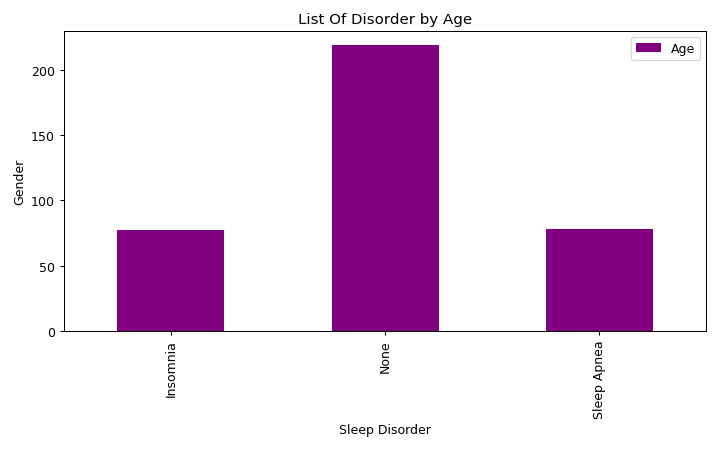

In [63]:
grouped_gender=disorder_df.groupby("Sleep Disorder")
age_count = pd.DataFrame(grouped_gender["Age"].count())
gender_count = age_count.plot(kind='bar', color="purple",figsize=(8,5))
plt.title("List Of Disorder by Age")
plt.xlabel("Sleep Disorder")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

In [64]:
female_disorder_df=disorder_df[(disorder_df["Gender"]=="Female") & (disorder_df["Sleep Disorder"]!="N/A")]
female_disorder_df.head()

,Gender,Age,Sleep Disorder,Sleep Duration
16,Female,29,Sleep Apnea,6.5
18,Female,29,Insomnia,6.5
30,Female,30,Sleep Apnea,6.4
31,Female,30,Insomnia,6.4
32,Female,31,None,7.9


In [65]:
female_disorder_df[female_disorder_df['Age']<= 40].mean()

C:\Users\odunz\AppData\Local\Temp\ipykernel_48288\4194293113.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  female_disorder_df[female_disorder_df['Age']<= 40].mean()


Age               36.163265
Sleep Duration     7.044898
dtype: float64

In [66]:
disorder_df.groupby(["Gender","Sleep Disorder"]).mean().reset_index()

,Gender,Sleep Disorder,Age,Sleep Duration
0,Female,Insomnia,44.944444,6.633333
1,Female,None,44.926829,7.650000
2,Female,Sleep Apnea,51.761194,7.035821
3,Male,Insomnia,42.268293,6.551220
4,Male,None,35.510949,7.183942
5,Male,Sleep Apnea,37.181818,7.009091


<IPython.core.display.Javascript object>


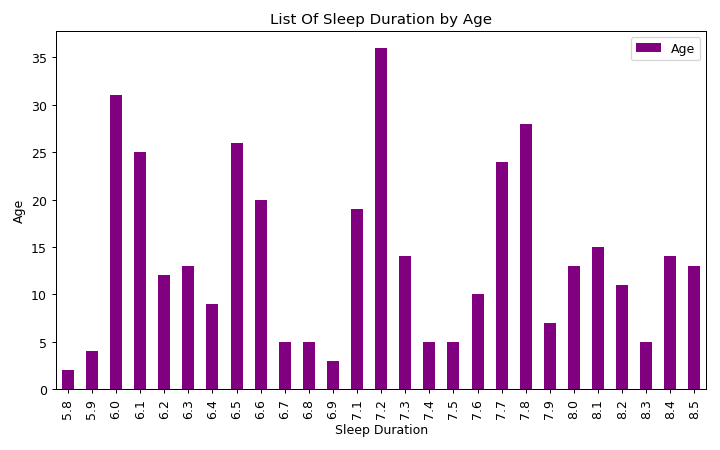

In [67]:
grouped_gender=disorder_df.groupby("Sleep Duration")
age_count = pd.DataFrame(grouped_gender["Age"].count())
gender_count = age_count.plot(kind='bar', color="purple",figsize=(8,5))
plt.title("List Of Sleep Duration by Age")
plt.xlabel("Sleep Duration")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


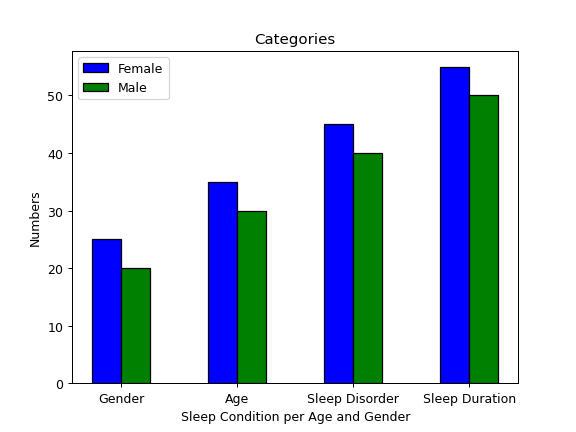

In [68]:
female = [25, 35, 45, 55] 
male = [20, 30, 40, 50] 
  
n=4
r = np.arange(n) 
width = 0.25
  
  
plt.bar(r, female, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Female') 
plt.bar(r + width, male, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Male') 
  
plt.xlabel("Sleep Condition per Age and Gender") 
plt.ylabel("Numbers") 
plt.title("Categories")
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['Gender', 'Age', 'Sleep Disorder', 'Sleep Duration']) 
plt.legend() 
  
plt.show() 